# Titanic Project

### Problem Definition
Use Machine Learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Data Dictionary 
. survival	Survival	0 = No, 1 = Yes

. pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

. sex	Sex

. Age	Age in years

. sibsp	number of siblings / spouses aboard the Titanic

. parch	# of parents / children aboard the Titanic

. ticket	Ticket number

. fare	Passenger fare

. cabin	Cabin number

. embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# Import required library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [61]:
# Load training data
train_data = pd.read_csv("train.csv")

# Load test data
test_data = pd.read_csv("test.csv")

# check data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Exploratory Data Analysis (EDA)
> We’ll explore the dataset to understand its structure, identify missing values, and visualize relationships.

In [62]:
# check shape of the dataset
print(f"train_data: ",{train_data.shape})
print(f"test_data: ", {test_data.shape})

# get info about data
train_data.info()

# describe the data
train_data.describe()

train_data:  {(891, 12)}
test_data:  {(418, 11)}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

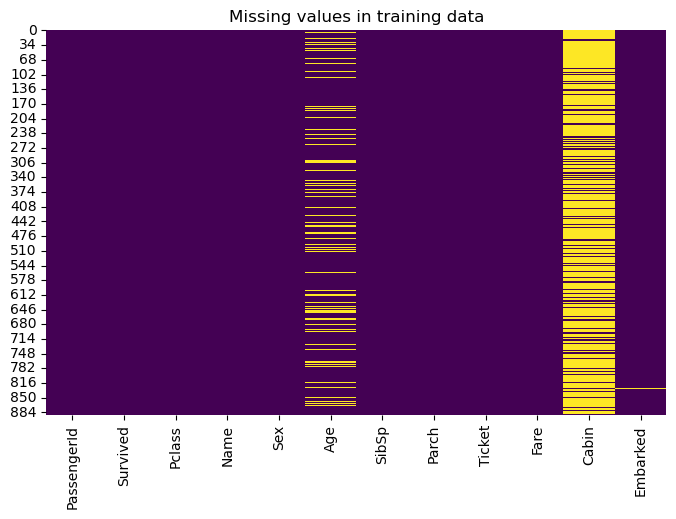

In [64]:
# check missing values
train_data.isnull().sum()

# visualize missing data with heatmap
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(train_data.isnull(),cbar = False, cmap = 'viridis')
plt.title("Missing values in training data")
plt.show()

**Visualize Relationship between data**

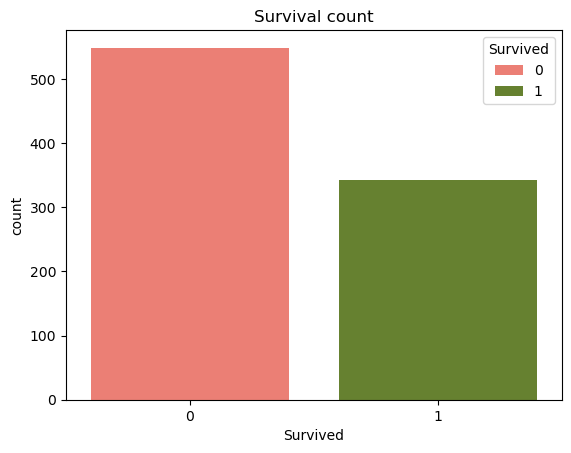

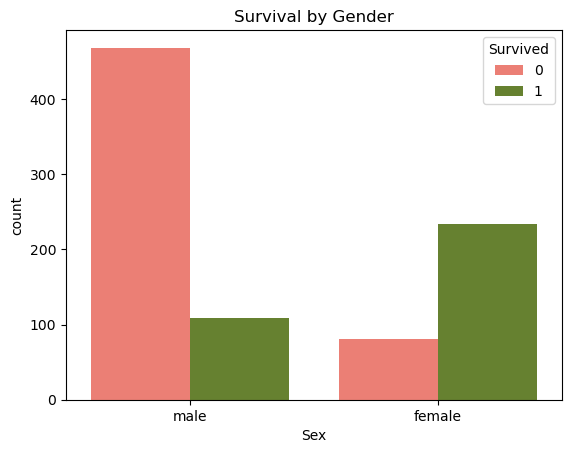

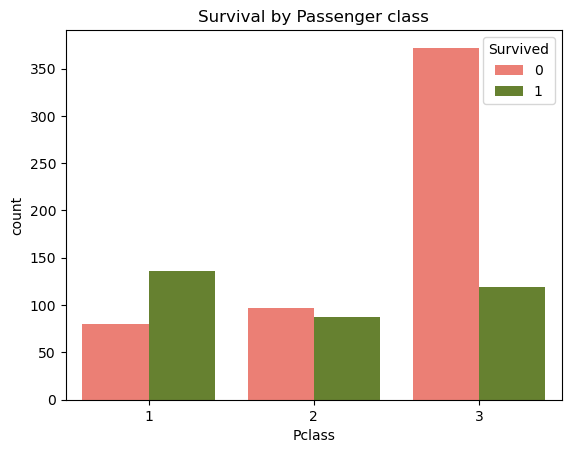

In [65]:
# Survival count
sns.countplot(x='Survived', data = train_data, hue='Survived', palette={0:'#FF6F61', 1:'#6B8E23'})
plt.title("Survival count")
plt.show()

# Survival by gender
sns.countplot(x='Sex', data = train_data, hue='Survived', palette={0:'#FF6F61', 1:'#6B8E23'})
plt.title("Survival by Gender")
plt.show()

# Survival by passenger class
sns.countplot(x='Pclass', data = train_data, hue='Survived', palette={0:'#FF6F61', 1:'#6B8E23'})
plt.title("Survival by Passenger class")
plt.show()

### Step 3: Preprocessing Data
> We’ll clean and preprocess the data to make it ready for modeling.

**Handling Missing values**

In [66]:
# Filling missing age with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Filling missing embark with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])# zero means the top frequency number and it's safe
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# Filling fare with median
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [67]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Feature Engineering**

In [68]:
# create new feature 'Family Size'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# create new feature is alone
train_data['IsAlone'] = (train_data['FamilySize']==1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize']==1).astype(int)# we use() to evaluate the condition first and change type later

In [69]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


**Encode Categorical Variables**

In [70]:
# convert 'Sex' into numerical value
train_data['Sex'] = train_data['Sex'].map({'male': 0,'female':1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# one-hot-encode embarked
# train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [71]:
print(train_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize', 'IsAlone',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


**Drop Unnecessary Columns**

In [72]:
# drop columns that won't be used
train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace=True)
test_data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace=True)
# train_data.columns
# test_data.columns

### Step 4: Model Building
> We’ll start with a baseline model and then move to advanced models like CatBoost and XGBoostm.

**Split the Data**

In [73]:
from sklearn.model_selection import train_test_split

# Define feature and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [74]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
IsAlone       0
Embarked_Q    0
Embarked_S    0
dtype: int64

**Baseline Model(Logistic Regression)**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

# make predictions
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val,y_pred)
print(f"Baseline Model accuracy: ", {accuracy})

Baseline Model accuracy:  {0.7988826815642458}


### Step 5: Advanced Models (CatBoost and XGBoost)

**CatBoost**

In [79]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# initialize catboost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Train the model
catboost_model.fit(X_train,y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_val)

# Evaluate the model
accuracy_catboost = accuracy_score(y_val, y_pred_catboost)
print(f"Catboost Accuracy: ", {accuracy_catboost})

# Classification Report
print("Catboost Classification Report: ")
print(classification_report(y_val,y_pred_catboost))

Catboost Accuracy:  {0.8212290502793296}
Catboost Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



**XGBOOST**

In [80]:
from xgboost import XGBClassifier

# Initialize xgbclassifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train,y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val,y_pred_xgb)
print(f"XGBoost Accuracy: ", {accuracy_xgb})

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_val,y_pred_xgb))

XGBoost Accuracy:  {0.8156424581005587}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### Step 6: Hyperparameter Tuning (GridSearchCV)
> We’ll use `GridSearchCV` to find the best hyperparameters for XGBoost.

In [83]:
from sklearn.model_selection import GridSearchCV

# Define parameter Grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize Gridsearchcv
gridsearch = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Fit GridSearch
gridsearch.fit(X_train,y_train)

# Best parameters and score
print(f"Best Parameter:", gridsearch.best_params_)
print(f"Best Accuracy:", gridsearch.best_score_)

# Use the best model
best_xgb_model = gridsearch.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy: 0.8384516891559144


### Step 7: Model Evaluation
> We’ll evaluate the best model using metrics like precision, recall, F1-score, and ROC-AUC.

Precision: 0.8225806451612904
Recall: 0.6891891891891891
F1-Score: 0.75
ROC-AUC: 0.8787644787644787


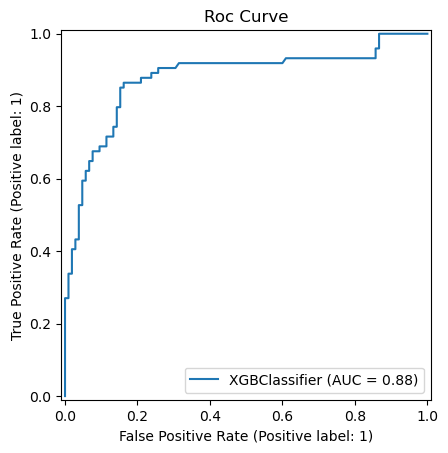

In [86]:
from sklearn.metrics import precision_score,recall_score,f1_score,RocCurveDisplay,roc_auc_score

# Make prediction with the best model
y_pred_best = best_xgb_model.predict(X_val)

# Calculate metrics
precision = precision_score(y_val, y_pred_best)
recall = recall_score(y_val, y_pred_best)
f1 = f1_score(y_val, y_pred_best)
roc_auc = roc_auc_score(y_val, best_xgb_model.predict_proba(X_val)[:, 1])

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

#Plot roc curve
roc_curve = RocCurveDisplay.from_estimator(best_xgb_model, X_val,y_val)
plt.title("Roc Curve")
plt.show()

### Step 8: Make Predictions on Test Data
> Finally, let’s use the best model to predict survival on the test data.

In [87]:
best_xgb_model.feature_importances_

array([0.21773668, 0.4912378 , 0.03513218, 0.10350171, 0.01618981,
       0.04152888, 0.03079865, 0.        , 0.        , 0.06387426],
      dtype=float32)